Seaborn ile grafik oluşturma bölümümüze hepiniz hoşgeldiniz. Hazırsanız hemen . başlayalım. İlk olarak seabornu import ediyorum, ardından matplotlibi import ediyorum. Son olarak dataframeler üzerinde işlem yapacağım için pandası import ediyorum.

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

Veri bilimine yeni başalayanların ilk olarak elini kirlettiği dataset olan titanic verisini pd.read_csv diyerek csv dosyamı full path olarak localimden getiriyorum. Head fonksiyonumla birlikte ilk 5 adet satıra göz gezdiriyorum

In [ ]:
df=pd.read_csv("train.csv", sep=",")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


info fonksiyonu ile birlikte toplam satır ve sütun sayısına bakıp, ayrıca her değişkenin veri tiplerinin int mı float mı object yani kategorik olup olmadığına göz atıyorum

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


dtypes ile birlikte her değişkenin sadece veri tiplerini görebiliyorum. Bu komutu da info dışında sadece değişken tiplerini merak ediyorsanız kullanabilirsiniz.

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#size komutu ile toplam veri sayımızın 10 bin 692 bin adet olduğunu 
df.size

10692

In [ ]:
# shape komutu ile beraber de 891 satır, 12 değişkenimizin olduğunu analiz ediyoruz.
df.shape

(891, 12)

In [ ]:
#istatistiksel analiz yaparız (mean,std min ve Q1,q2,q3 max min ve count değerleri vardır.)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
#eksik veri sayısına isnull sum diyerek bakıyorum. 
df.isnull().sum()


NameError: ignored

In [ ]:
# ardından na olanları drop ediyorum
df = df.dropna()

NameError: ignored

In [ ]:
#
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**## SEABORN İLE VERİ GÖRSELLEŞTİRME**

BARPLOT

İlk olarak barplot grafiğimizle başlayalım. Cinsiyete göre survived dağılımına bakalım Yani cinsiyet değişkeninin sınıf frekanslarına baktığımda kadınların daha çok hayatta kaldığını görselden rahat bir şekilde analiz ediyorum

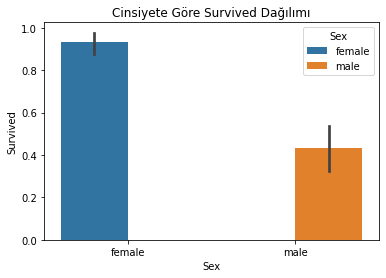

In [ ]:
a=sns.barplot(x="Sex", y="Survived", hue="Sex", data=df);
a.set_title("Cinsiyete Göre Survived Dağılımı");

Pairplot, tüm verisetinde  sayısal değişkenler arasında  çift yönlü ilişkiler çizer. Kullanımı da şöyledir

# *PairPlot* : sürekli değişkenlerin özet grafiğidir

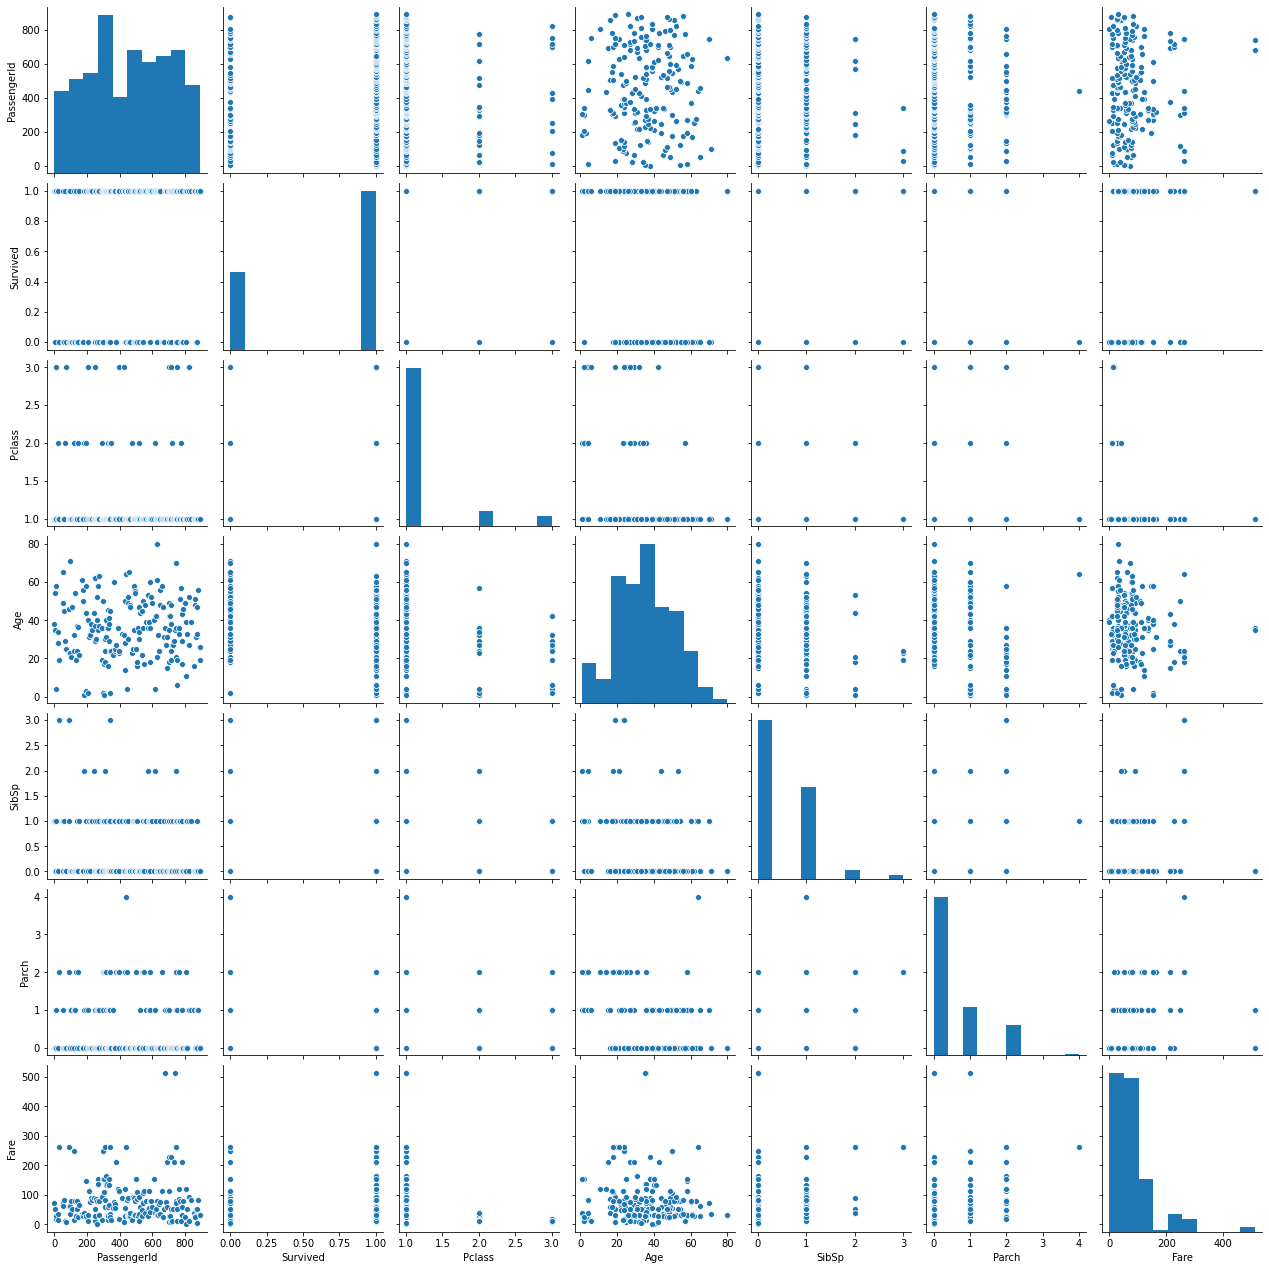

In [ ]:
sns.pairplot(df);

## HEATMAP (CORRELATION MATRIX)

Heatmap grafiğimiz ile değişkenlerin arasında ilişkinin nasıl olduğuna ve target değişkenim ile bağımsız değişkenlerim arasındaki ilişkiyi sayısal olarak çok net bir şekilde analiz ediyorum. Benim çok sık kullandığım bir grafiktir. Korelasyon analizi için bu grafiği kullanmayı unutmayın.

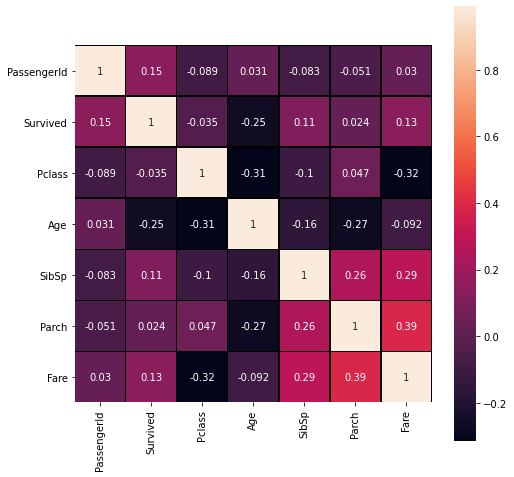

In [ ]:
corr=df.corr()
plt.figure(figsize=(8, 8))
a=sns.heatmap(corr, vmax=.99, linewidths=0.5,square=True,annot=True,linecolor="black");

## COUNTPLOT

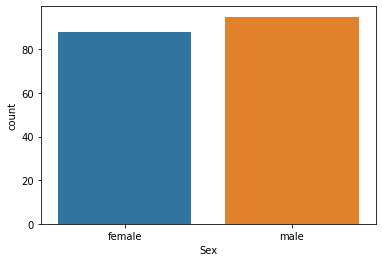

In [ ]:
sns.countplot(x=df.Sex)
plt.show()

Şimdi de sıra sütun grafiği yani countplot, kategorik değişkenleri görselleştirmede kullanılır.


CATPLOT : Catplot grafiği sayesinde kind parametresinde istediğiniz count,bar violin, boxplot gibi grafik türlerini elde edebilirsiniz. Hadi kullanımına bakalım

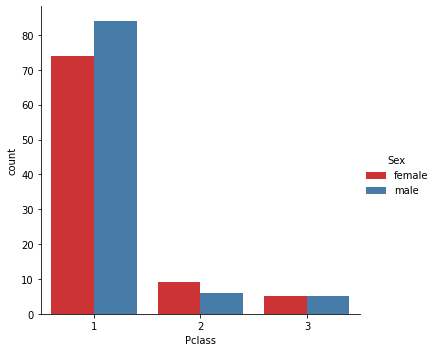

In [ ]:
#CATPLOT İLE BAR GRAFİK ÇİZDİRME


sns.catplot(x="Pclass", kind="count", hue="Sex", palette="Set1", data=df);
#RdBu
#Greys_r
#YlGnBu_r
#Greens

In [ ]:
sns.catplot(y="Survived",x="Sex",data=df, kind="bar")

Boxplot grafiği ile de median, quartile değerlerine ulaşanilir. Outlierları belirlemek için kullanırız.

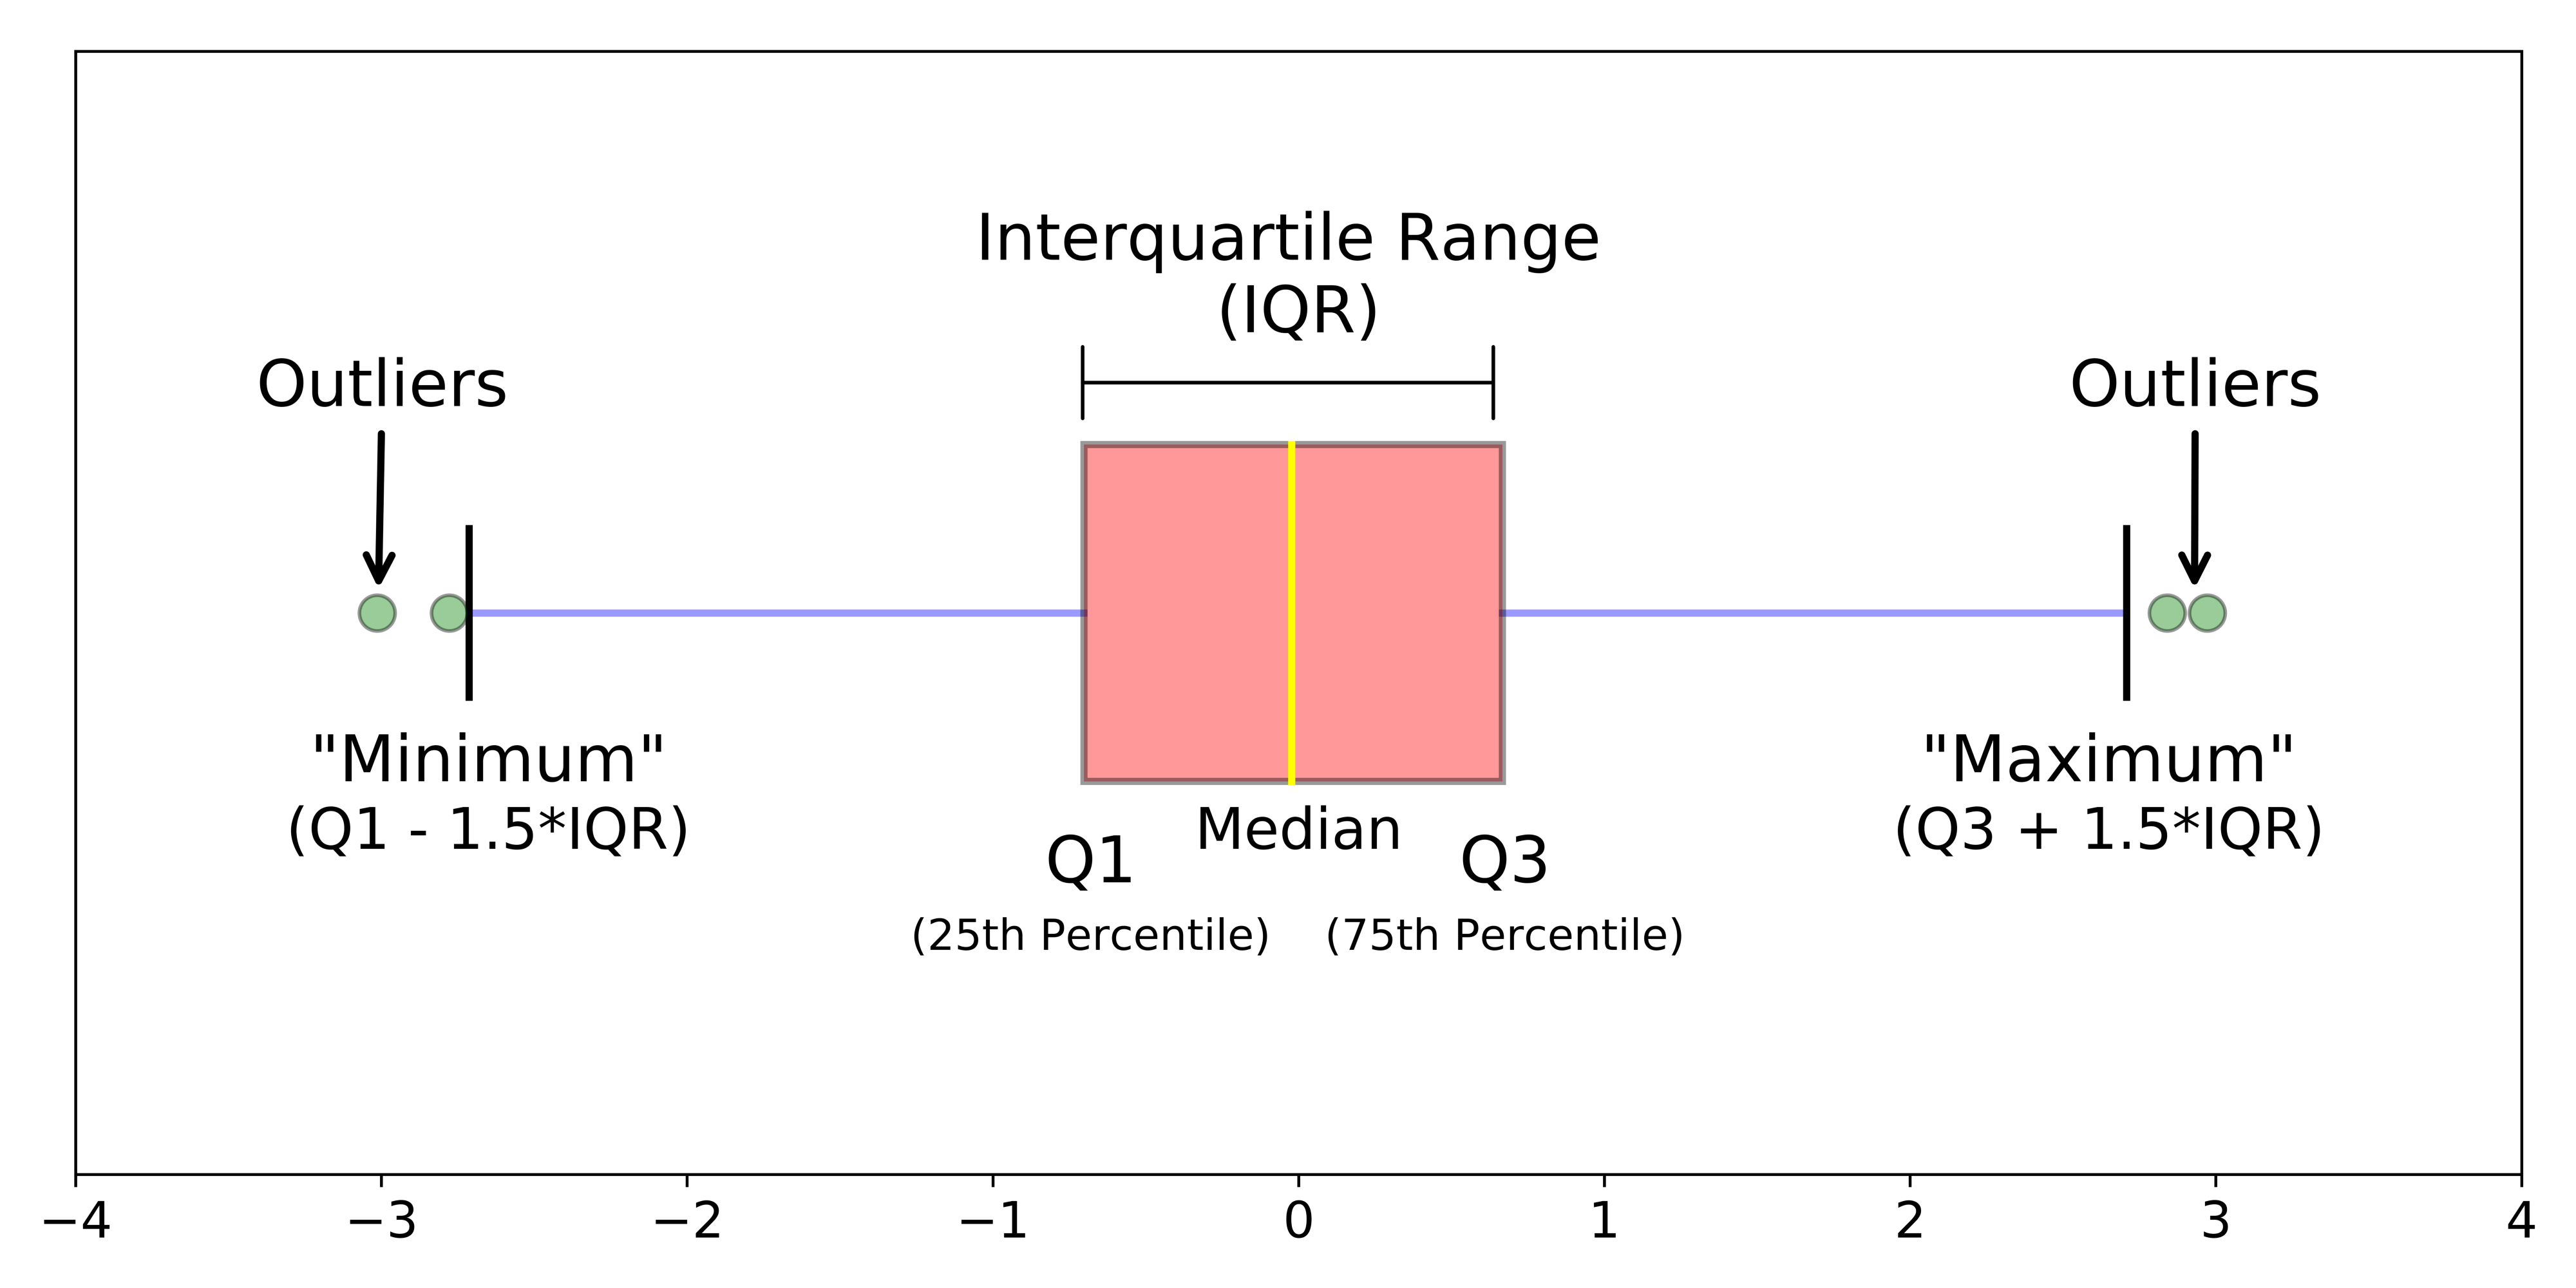

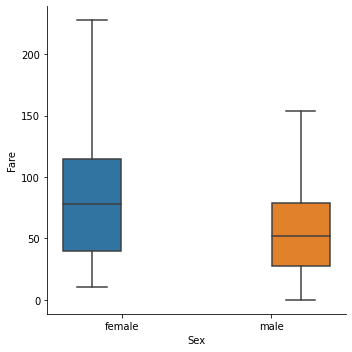

In [ ]:
#CATPLOT İLE BOXPLOT ÇİZDİRME 
#BOXPlot ile değişkenlerin outlier, median ve mean değerlerine bakıp yorum yapabiliriz.

sns.catplot(y="Fare",x="Sex", data=df,kind="box" , hue="Sex", sym="")

**SCATTERPLOT**

Scatterplot ,  iki farklı değişkenin arasındaki ilişkiyi belirlemek için kullanılır. Aralarındaki ilişkinin sebebi görülemese de, ilgili iki değişkenin arasında direkt olarak bir ilişki bulunup bulunmadığı ve bu ilişkinin ne derece güçlü olduğu konusunda da bize çok yardımcı olur.

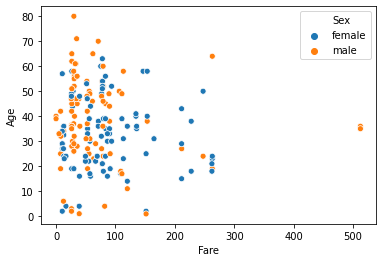

In [ ]:
sns.scatterplot(x="Fare", y="Age", data=df, hue="Sex");

In [ ]:
#görsellerimizi paper, talk veya poster olarak kaydedebiliyoruz.
sns.set_context("paper")
plt.show()

NameError: ignored